#**Librerías**

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')

#**Data**

In [30]:
from sklearn.datasets import fetch_california_housing

In [31]:
california = fetch_california_housing()

In [32]:
df_california = pd.DataFrame(data = california.data, columns = california.feature_names)
df_california['MedHouseVal'] = california.target

#**Análisis exploratorio de datos**

In [33]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
df_california.shape

(20640, 9)

##**Resumen estadístico**

In [35]:
df_california.describe()        #AveOccup presenta probablemente Outliers porque tiene una diferencia muy grande entre su mínimo, quantiles y su máximo

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##**Eliminación de Outliers de AveOccup**

In [36]:
mean = df_california['AveOccup'].mean()
std = df_california['AveOccup'].std()
std_3 = std * 3

lower,upper = mean - std_3,mean + std_3
df_california = df_california[(df_california['AveOccup'] > lower) & (df_california['AveOccup'] < upper)]

#**Eliminación de Outliers de Population**

In [37]:
mean = df_california['Population'].mean()
std = df_california['Population'].std()
std_3 = std * 3

lower,upper = mean - std_3,mean + std_3
df_california = df_california[(df_california['Population'] > lower) & (df_california['Population'] < upper)]

##**Eliminación de Outliers de AveRooms**

In [38]:
mean = df_california['AveRooms'].mean()
std = df_california['AveRooms'].std()
std_3 = std * 3

lower,upper = mean - std_3,mean + std_3
df_california = df_california[(df_california['AveRooms'] > lower) & (df_california['AveRooms'] < upper)]

##**Eliminación de Outliers de AveBedrms**

In [39]:
mean = df_california['AveBedrms'].mean()
std = df_california['AveBedrms'].std()
std_3 = std * 3

lower,upper = mean - std_3,mean + std_3
df_california = df_california[(df_california['AveBedrms'] > lower) & (df_california['AveBedrms'] < upper)]

In [40]:
df_california.describe() #Ahora si los estadísticos son más razonables

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000
mean,3.880167,29.087066,5.246991,1.056928,1350.240846,2.935709,35.617245,-119.589036,2.082603
std,1.906145,12.457548,1.200609,0.089814,809.633441,0.875796,2.121248,1.994234,1.157720
min,0.499900,1.000000,0.846154,0.625000,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.566400,19.000000,4.422062,1.004283,798.000000,2.435401,33.930000,-121.810000,1.208000
50%,3.539800,29.000000,5.189744,1.046683,1167.000000,2.824762,34.250000,-118.490000,1.814000
75%,4.751500,37.000000,5.979665,1.094915,1699.000000,3.286017,37.710000,-118.020000,2.667000
max,15.000100,52.000000,12.500000,1.520921,4812.000000,33.952941,41.950000,-114.550000,5.000010


##**Varianza de las variables**

In [41]:
print(df_california.var())

MedInc              3.633391
HouseAge          155.190500
AveRooms            1.441462
AveBedrms           0.008067
Population     655506.309414
AveOccup            0.767018
Latitude            4.499695
Longitude           3.976971
MedHouseVal         1.340315
dtype: float64


#**Verificar la varianza de las variables realizando una normalización**

In [42]:
normalize = df_california/df_california.mean()
print(normalize.var())                               #Se desprende que variables Longitude tiene la varianza más baja, por lo que es candidata a ser quitada

MedInc         0.241330
HouseAge       0.183428
AveRooms       0.052358
AveBedrms      0.007221
Population     0.359546
AveOccup       0.088998
Latitude       0.003547
Longitude      0.000278
MedHouseVal    0.309025
dtype: float64


#**Gráfico para ver la relación entre variables y distribuciones**

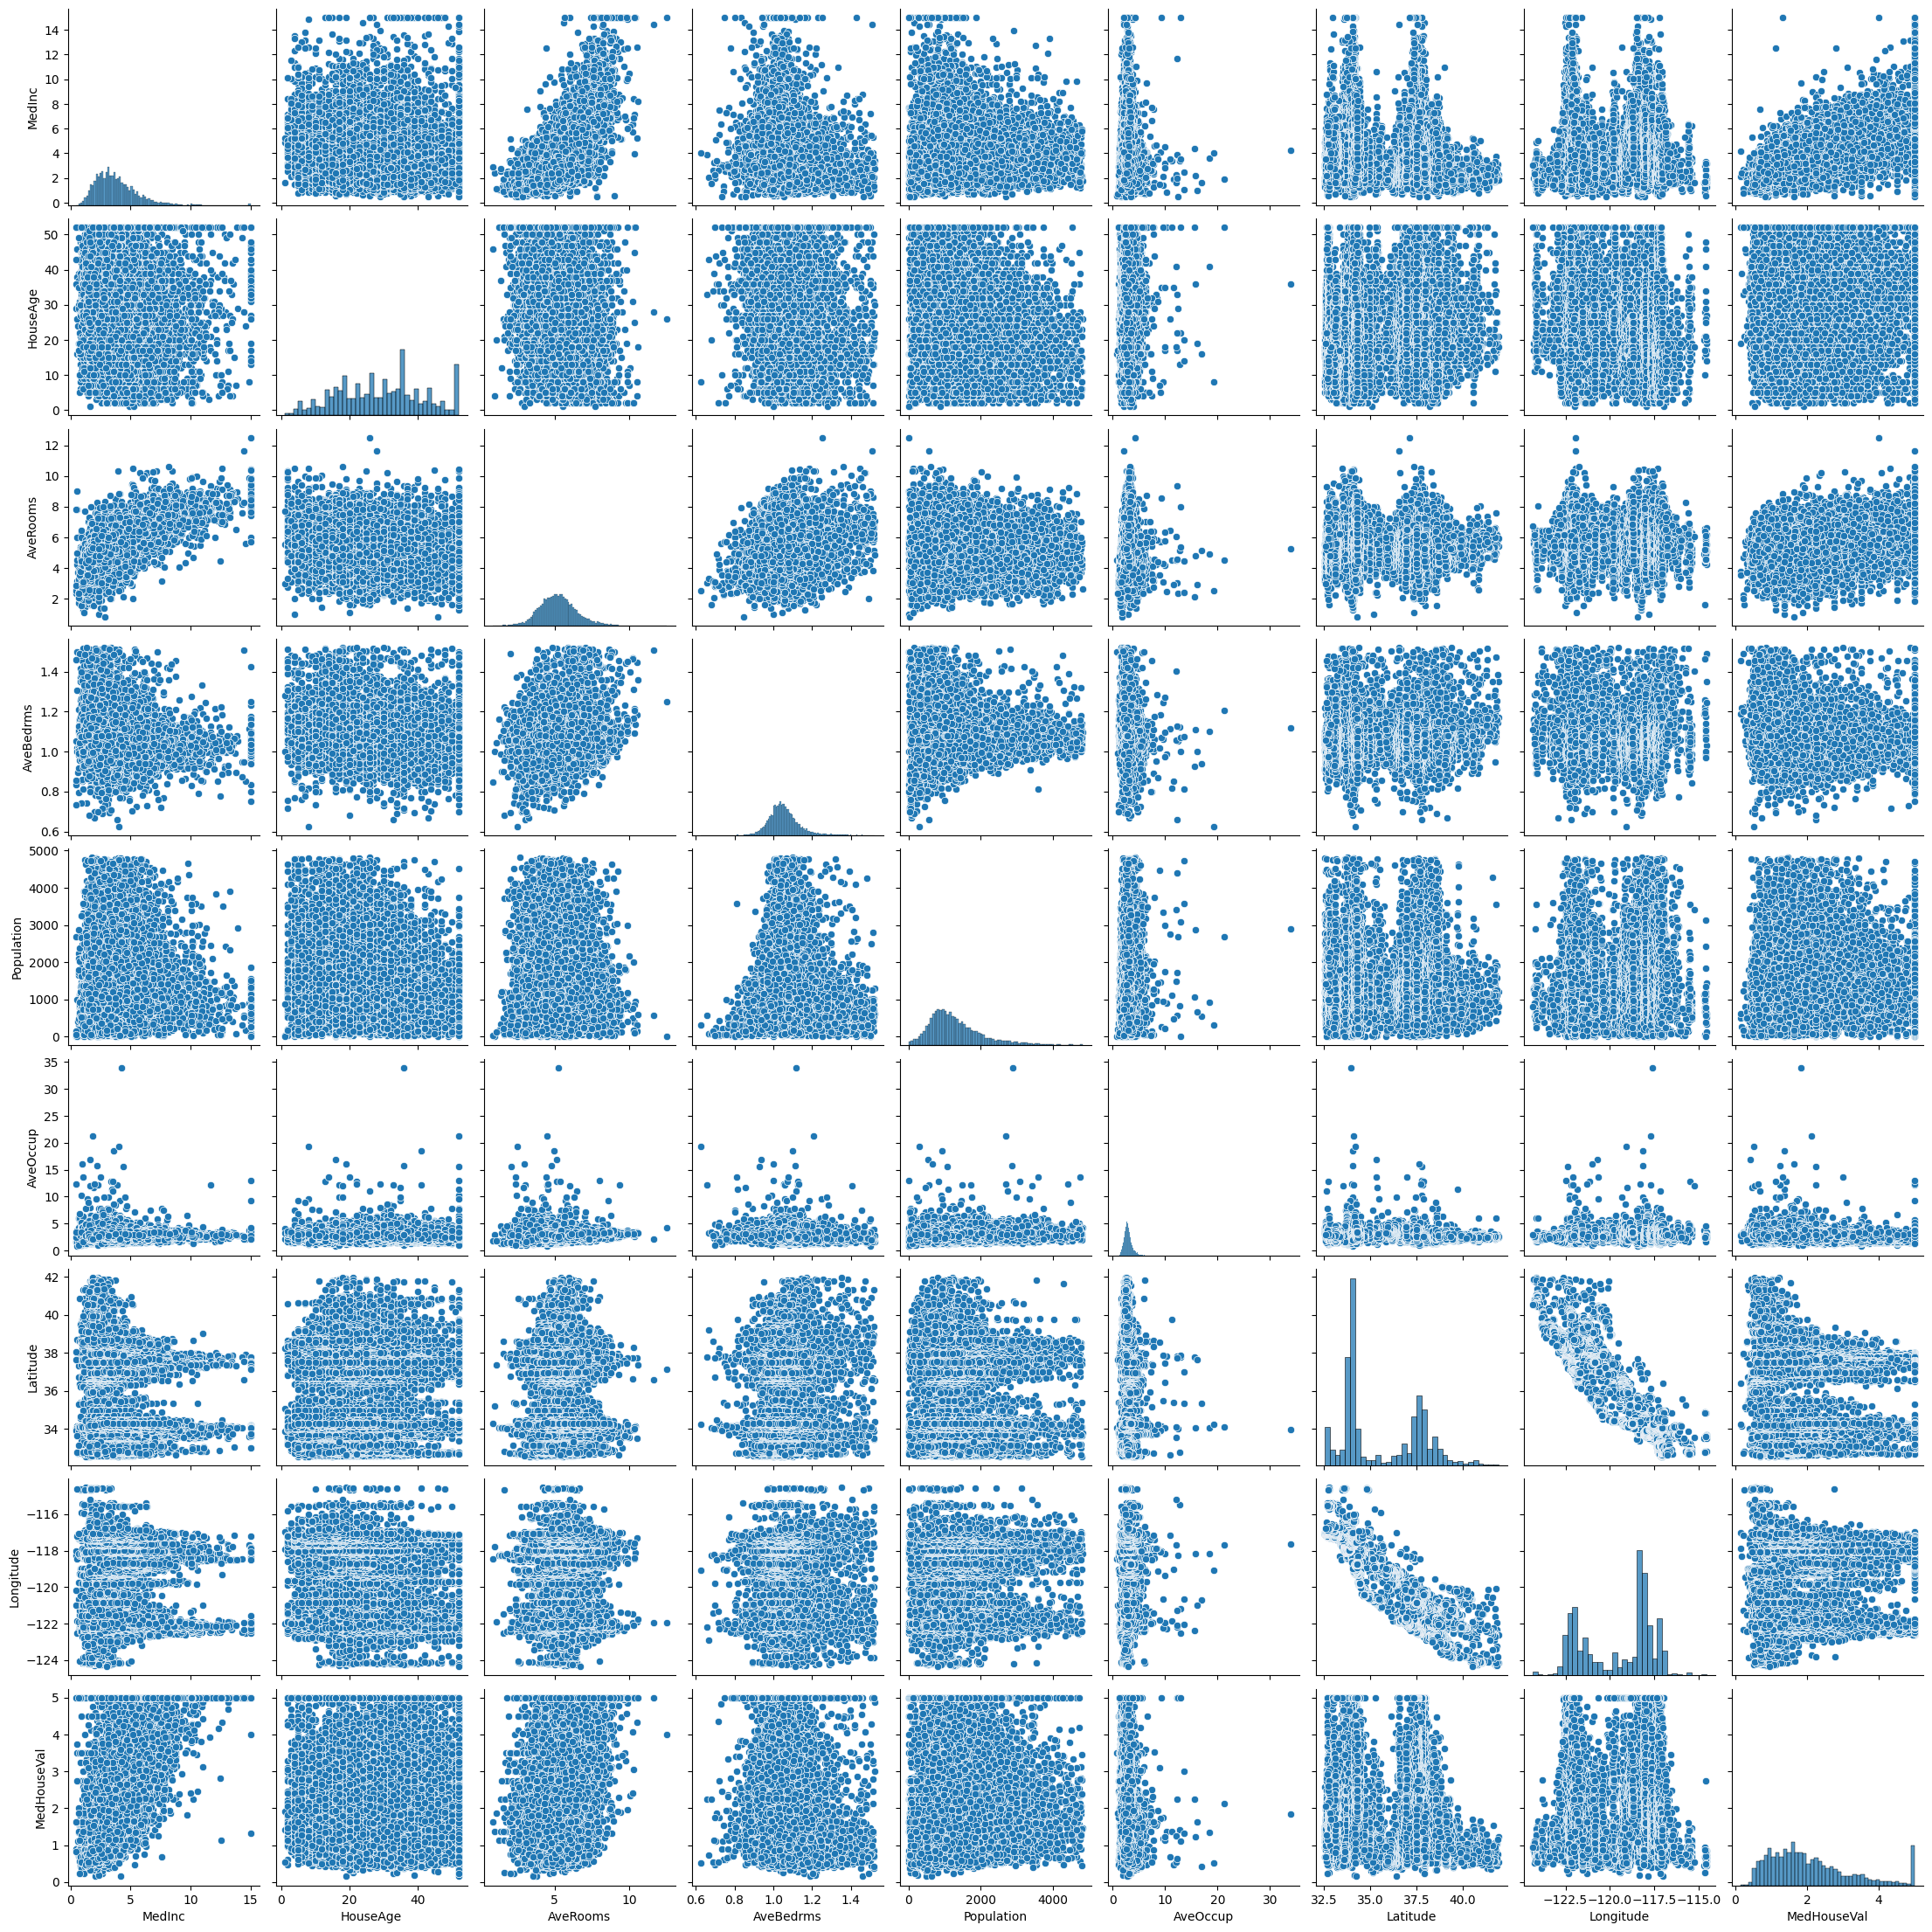

In [43]:
sns.pairplot(df_california,diag_kind ='hist')
                                                  #Se puede ver cierta correlación entre la variable AveRooms y AveBedrms
                                                  #También se ve cierta correlación entre Latitude y Longitude

##**Verificación de Outliers para Occup**

##**Heatmap para ver correlaciones**

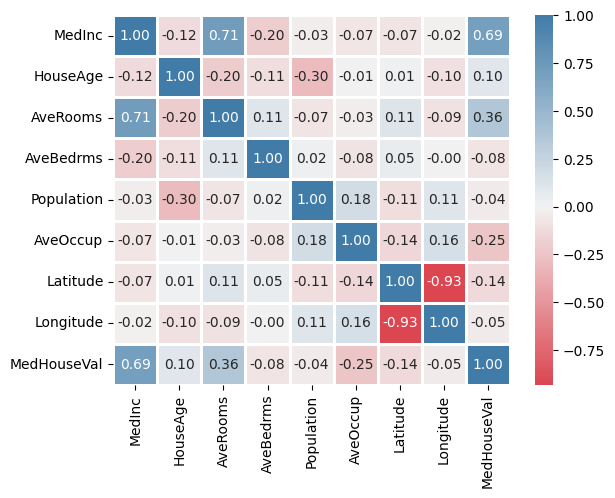

In [82]:
cmap = sns.diverging_palette(h_neg = 10,h_pos = 240,as_cmap = True)                                   #MedInc tiene una correlación de 0.71 con AveRooms
sns.heatmap(df_california.corr(),center = 0,cmap = cmap,linewidths = 1,annot = True,fmt =".2f")       #Latitude y Longitude tienen una correlación negativa de 0.93
# plt.savefig('heatmap_casas.png', bbox_inches='tight', dpi=300)
plt.show()


#**Generación de modelos**

##**Selección de variables y división de datos para modelos lineales**

In [47]:
X = df_california.drop(columns = ['MedHouseVal','Longitude','AveRooms'])
y = df_california['MedHouseVal']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
scaler = StandardScaler()
X_train_estandarizada = scaler.fit_transform(X_train)
X_test_estandarizada = scaler.transform(X_test)


##**Regresión lineal**

In [48]:
lr = LinearRegression()
lr.fit(X_train_estandarizada,y_train)
predicciones_regresion = lr.predict(X_test_estandarizada)
mse_regresion = MSE(y_test,predicciones_regresion)
rmse_regresion = np.sqrt(mse_regresion)
prediccion_train = lr.predict(X_train_estandarizada)
rmse_regresion_train = np.sqrt(MSE(y_train,prediccion_train))
print(f'Root Mean Squared Error Regresión lineal conjunto de train: {rmse_regresion_train}') #Es para medir si el modelo tiene overfitting comparando train con test
print(f"Root Mean Squared Error Regresión lineal conjunto de test: {rmse_regresion}")



Root Mean Squared Error Regresión lineal conjunto de train: 0.7536804353739236
Root Mean Squared Error Regresión lineal conjunto de test: 0.7631557682429161


#**Regresión Lasso**

In [49]:
lassocv = LassoCV()
lassocv.fit(X_train_estandarizada,y_train)
print(f'Valor óptimo de alpha: {lassocv.alpha_}') #Valor óptimo de alpha
prediccion_lasso = lassocv.predict(X_test_estandarizada)
rmse_lasso = np.sqrt(MSE(y_test,prediccion_lasso))
prediccion_lasso_train = lassocv.predict(X_train_estandarizada)
rmse_lasso_train = np.sqrt(MSE(y_train,prediccion_lasso_train))
print(f'Root Mean Squared Error para la regresión lasso conjunto Train: {rmse_lasso_train}')
print(f'Root Mean Squared Error para la regresión lasso conjunto Test: {rmse_lasso}')

Valor óptimo de alpha: 0.0008007497973874806
Root Mean Squared Error para la regresión lasso conjunto Train: 0.7536840210230656
Root Mean Squared Error para la regresión lasso conjunto Test: 0.7631653473808727


##**Verificar si alguno de los coeficientes tendió a 0**

In [50]:
coeficientes = lassocv.coef_     #Coeficientes No se eliminó ninguno
for variable, coef in zip(X.columns,coeficientes):
  print(f'{variable} : {coef}')

MedInc : 0.8190929437672034
HouseAge : 0.24278372334780424
AveBedrms : 0.08007869368748248
Population : 0.07558292824371923
AveOccup : -0.2589163583429989
Latitude : -0.13736471174089723


#**Train Test Split para Árboles**
* Ya que los árboles no necesitan estandarización y no tienen problemas con la colinealidad, se seleccionarán de nuevo las variables a utilizar

In [51]:
X = df_california.drop(columns = ['MedHouseVal'])
y = df_california['MedHouseVal']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

##**Decision Tree Regressor**

In [52]:
params_dt = {'max_depth': range(2,11),
             'min_samples_leaf': np.arange(0.05,0.4,0.05)}

dt = DecisionTreeRegressor(random_state = 42)
decision_tree_rs_cv = RandomizedSearchCV(dt,param_distributions = params_dt,cv = 10,n_iter = 70,n_jobs = -1,refit = True,scoring = 'neg_mean_squared_error')
decision_tree_rs_cv.fit(X_train,y_train)

print(f'Mejores parametros encontrados: {decision_tree_rs_cv.best_params_}')
print(f'RMSE más bajo encontrado en el conjunto de validación: {np.sqrt(np.abs(decision_tree_rs_cv.best_score_))}')

predicciones_dt = decision_tree_rs_cv.predict(X_test)
rmse_decision_tree = np.sqrt(MSE(y_test,predicciones_dt))
print(f'RMSE conjunto de Test del modelo Decision Tree: {rmse_decision_tree}')


Mejores parametros encontrados: {'min_samples_leaf': 0.05, 'max_depth': 6}
RMSE más bajo encontrado en el conjunto de validación: 0.7544221318194486
RMSE conjunto de Test del modelo Decision Tree: 0.7615414279122606


#**Random Forest Regressor**

In [53]:
params_rf = {'n_estimators': np.arange(100,1000,100),
             'max_depth': range(2,5),
             'min_samples_leaf': np.arange(0.05,0.5,0.05)}

rf = RandomForestRegressor(random_state = 42)
rf_rs_cv = RandomizedSearchCV(rf,param_distributions = params_rf,cv = 4,n_iter = 20,refit = True,n_jobs = -1,scoring = 'neg_mean_squared_error')
rf_rs_cv.fit(X_train,y_train)

print(f'Mejores parámetros encontrados: {rf_rs_cv.best_params_}')
print(f'RMSE más bajo encontrado en el conjunto de validación: {np.sqrt(np.abs(rf_rs_cv.best_score_))}')

predicciones_rf = rf_rs_cv.predict(X_test)
rmse_rf = np.sqrt(MSE(y_test,predicciones_rf))
print(f'RMSE conjunto de Test del modelo Random Forest Regressor: {rmse_rf}')

Mejores parámetros encontrados: {'n_estimators': 400, 'min_samples_leaf': 0.05, 'max_depth': 2}
RMSE más bajo encontrado en el conjunto de validación: 0.8509819488057585
RMSE conjunto de Test del modelo Random Forest Regressor: 0.8594405514291257


##**Gradient Boosting**

In [54]:
params_sgbt = {'max_depth': range(1,4),
               'subsample': np.arange(0.6,0.9,0.1),
               'max_features': ['auto','sqrt','log2',None],
               'n_estimators': np.arange(100,1000,100)}

sgbt = GradientBoostingRegressor(random_state = 42)
sgbt_rs_cv = RandomizedSearchCV(sgbt,param_distributions = params_sgbt,cv = 4,n_iter = 25,n_jobs = -1,refit = True,scoring = 'neg_mean_squared_error')
sgbt_rs_cv.fit(X_train,y_train)

print(f'Mejores parámetros encontrados: {sgbt_rs_cv.best_params_}')
print(f'RMSE más bajo encontrado en el conjunto de validación: {np.sqrt(np.abs(sgbt_rs_cv.best_score_))}')

predicciones_sgbt = sgbt_rs_cv.predict(X_test)
rmse_sgbt = np.sqrt(MSE(y_test,predicciones_sgbt))
print(f'RMSE conjunto de Testo del modelo Gradient Boosting Regressor: {rmse_sgbt}')

Mejores parámetros encontrados: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_features': None, 'max_depth': 3}
RMSE más bajo encontrado en el conjunto de validación: 0.47697239899835153
RMSE conjunto de Testo del modelo Gradient Boosting Regressor: 0.4767760580187741


#**Xtreme Gradient Boosting**

In [55]:
param_grid = {'learning_rate':np.arange(0.05,1.05,0.05),
              'n_estimators': np.arange(100,1000,100),
              'subsample': np.arange(0.05,1.05,0.05),
              'alpha':     np.arange(0,1.1,0.1),
              'gamma':     np.arange(0,1.1,0.1),
              'max_depth': np.arange(1,7,1)
              }

gbm = xgb.XGBRegressor(random_state = 42,objective = 'reg:squarederror')
xgb_rs_cv = RandomizedSearchCV(estimator = gbm,param_distributions = param_grid,n_iter = 100,cv = 4,n_jobs = -1,refit = True,scoring = 'neg_mean_squared_error',verbose = 1)
xgb_rs_cv.fit(X_train,y_train)
print("Mejores parámetros encontrados: ",xgb_rs_cv.best_params_)
print("RMSE Más bajo encontrado en el conjunto de validación: ",np.sqrt(np.abs(xgb_rs_cv.best_score_)))

predicciones_xgb = xgb_rs_cv.predict(X_test)
rmse_xgb = np.sqrt(MSE(y_test,predicciones_xgb))

print(f'Root Mean Squared Error para Xtreme Gradient Boosting: {rmse_xgb}')

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Mejores parámetros encontrados:  {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.1, 'alpha': 0.6000000000000001}
RMSE Más bajo encontrado en el conjunto de validación:  0.4625091367390876
Root Mean Squared Error para Xtreme Gradient Boosting: 0.45517643189009915


##**Train Test Split para Redes Neuronales**

In [76]:
X_red = df_california.drop(columns = ['MedHouseVal'])
X_train,X_test,y_train,y_test = train_test_split(X_red,y,test_size = 0.2,random_state = 42)

scaler_red = StandardScaler()
X_train_red = scaler_red.fit_transform(X_train)
X_test_red = scaler_red.transform(X_test)


##**Modelo con redes neuronales de Keras y optimizer Adam**

In [81]:
model_1 = Sequential()
model_1.add(Dense(60,input_shape = (X_train_red.shape[1],),activation = 'relu',kernel_initializer = 'he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dense(60,activation = 'relu',kernel_initializer = 'he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dense(1,kernel_initializer = 'he_normal'))
model_1.compile(optimizer = 'adam',loss = 'mse',metrics = [MeanSquaredError()])

#Definición del callback

detencion = EarlyStopping(patience = 3,)

history = model_1.fit(X_train_red,y_train,callbacks = [detencion],epochs = 15,validation_split = 0.2,batch_size = 32,verbose = 0)
mse_red = model_1.evaluate(X_test_red,y_test)
rmse_red = np.sqrt(mse_red[0])
print(f'El Root Mean Squared Error con red neuronal es: {rmse_red}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2997 - mean_squared_error: 0.2997
El Root Mean Squared Error con red neuronal es: 0.5564659781616983


#**Modelo Keras con optimizer SGD utilizando Dropout**

In [80]:
def get_new_model(input_shape):
  model_2 = Sequential()
  model_2.add(Dense(50,input_shape = (input_shape,),activation = 'relu',kernel_initializer = 'normal'))
  model_2.add(Dropout(0.2))
  model_2.add(Dense(50,activation = 'relu',kernel_initializer = 'normal'))
  model_2.add(Dropout(0.2))
  model_2.add(Dense(1,kernel_initializer = 'normal'))
  return (model_2)

lr_to_test = [0.001,0.01,0.1]

for lr in lr_to_test:
  model = get_new_model(X_train_red.shape[1])
  my_optimizer = SGD(learning_rate = lr)
  model.compile(optimizer = my_optimizer,loss = 'mse',metrics = [MeanSquaredError()])
  model.fit(X_train_red,y_train,callbacks = [detencion],epochs = 15,validation_split = 0.2,batch_size =16,verbose = 0)
  mse_red_sgd = model.evaluate(X_test_red,y_test)
  rmse_red_sgd = np.sqrt(mse_red_sgd[0])
  print(f"El RSME de la red Neuronal con optimizador SGD con Learning rate de {lr} es de: {rmse_red_sgd}")





124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6137 - mean_squared_error: 0.6137
El RSME de la red Neuronal con optimizador SGD con Learning rate de 0.001 es de: 0.7978885786791686
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3720 - mean_squared_error: 0.3720
El RSME de la red Neuronal con optimizador SGD con Learning rate de 0.01 es de: 0.624944946725395
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3325 - mean_squared_error: 0.3325
El RSME de la red Neuronal con optimizador SGD con Learning rate de 0.1 es de: 0.5879965651859467
